In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = './Rice_Dataset_Commeo_and_Osmancik/Rice_Cammeo_Osmancik.xlsx'
rice_df = pd.read_excel(path, sheet_name='Rice')

In [3]:
rice_df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [4]:
rice_df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [5]:
rice_df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

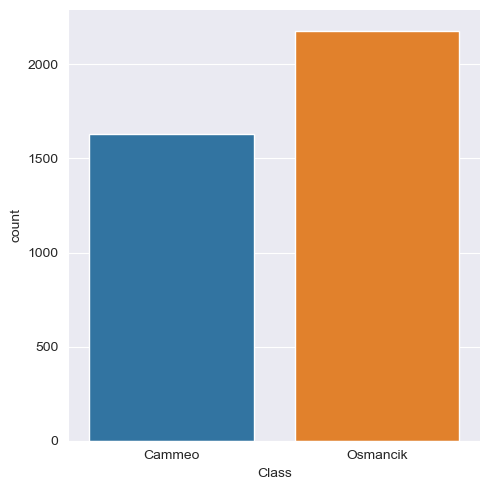

In [6]:
sns.catplot(data=rice_df, x='Class', kind='count')

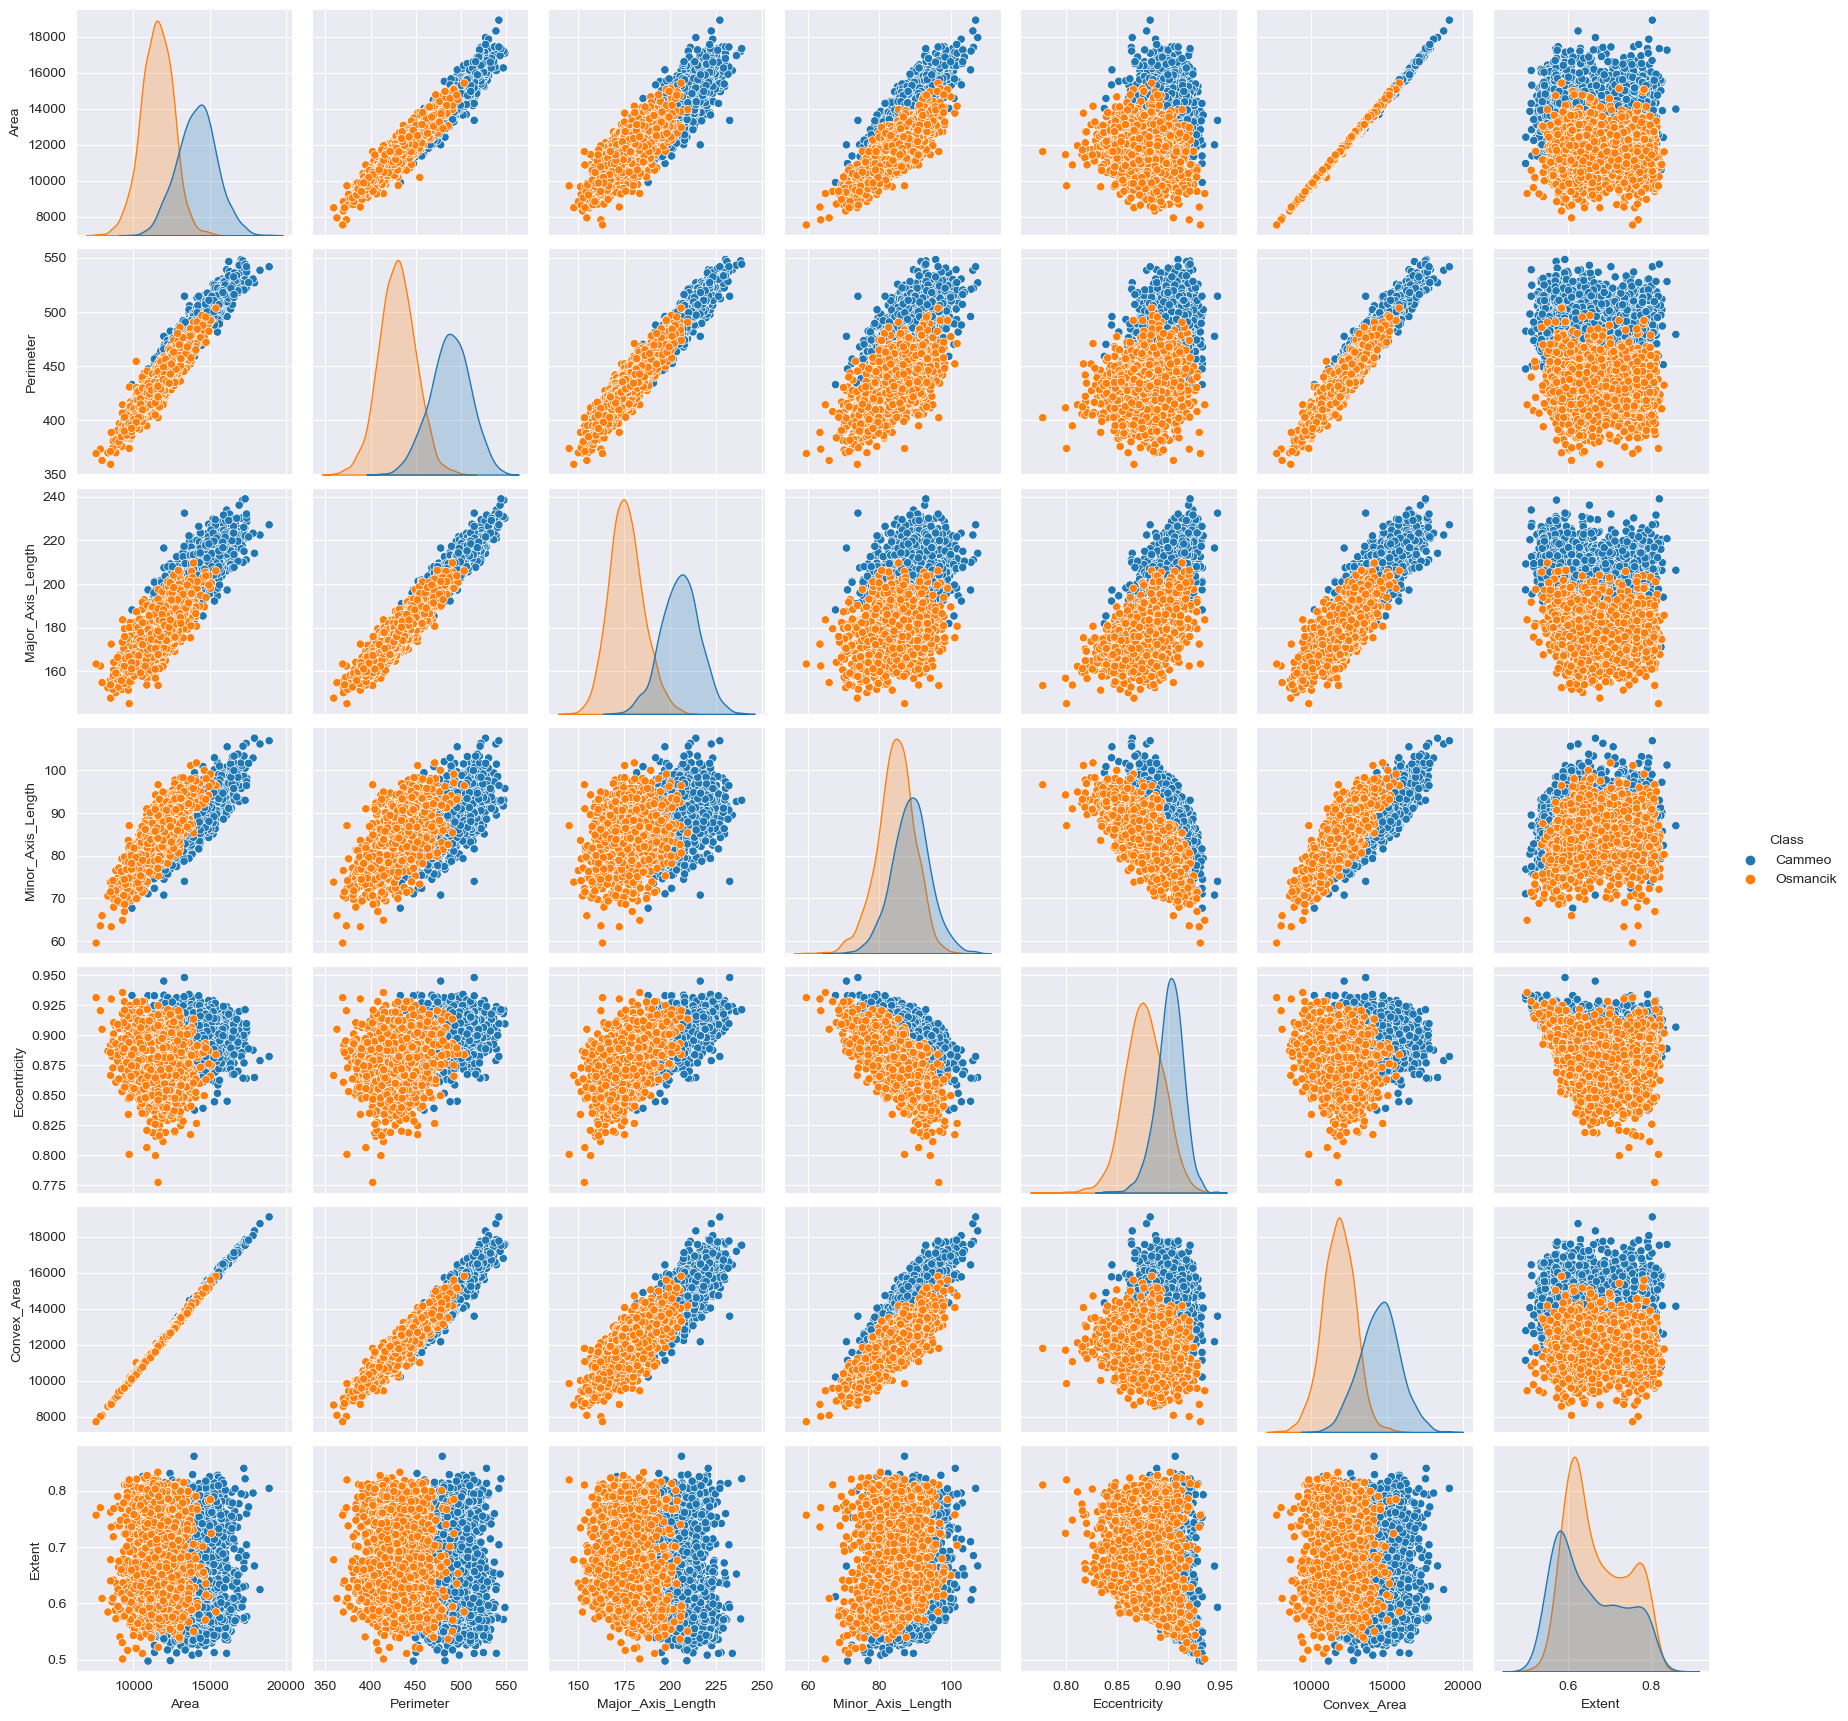

In [7]:
sns.pairplot(rice_df, hue='Class')

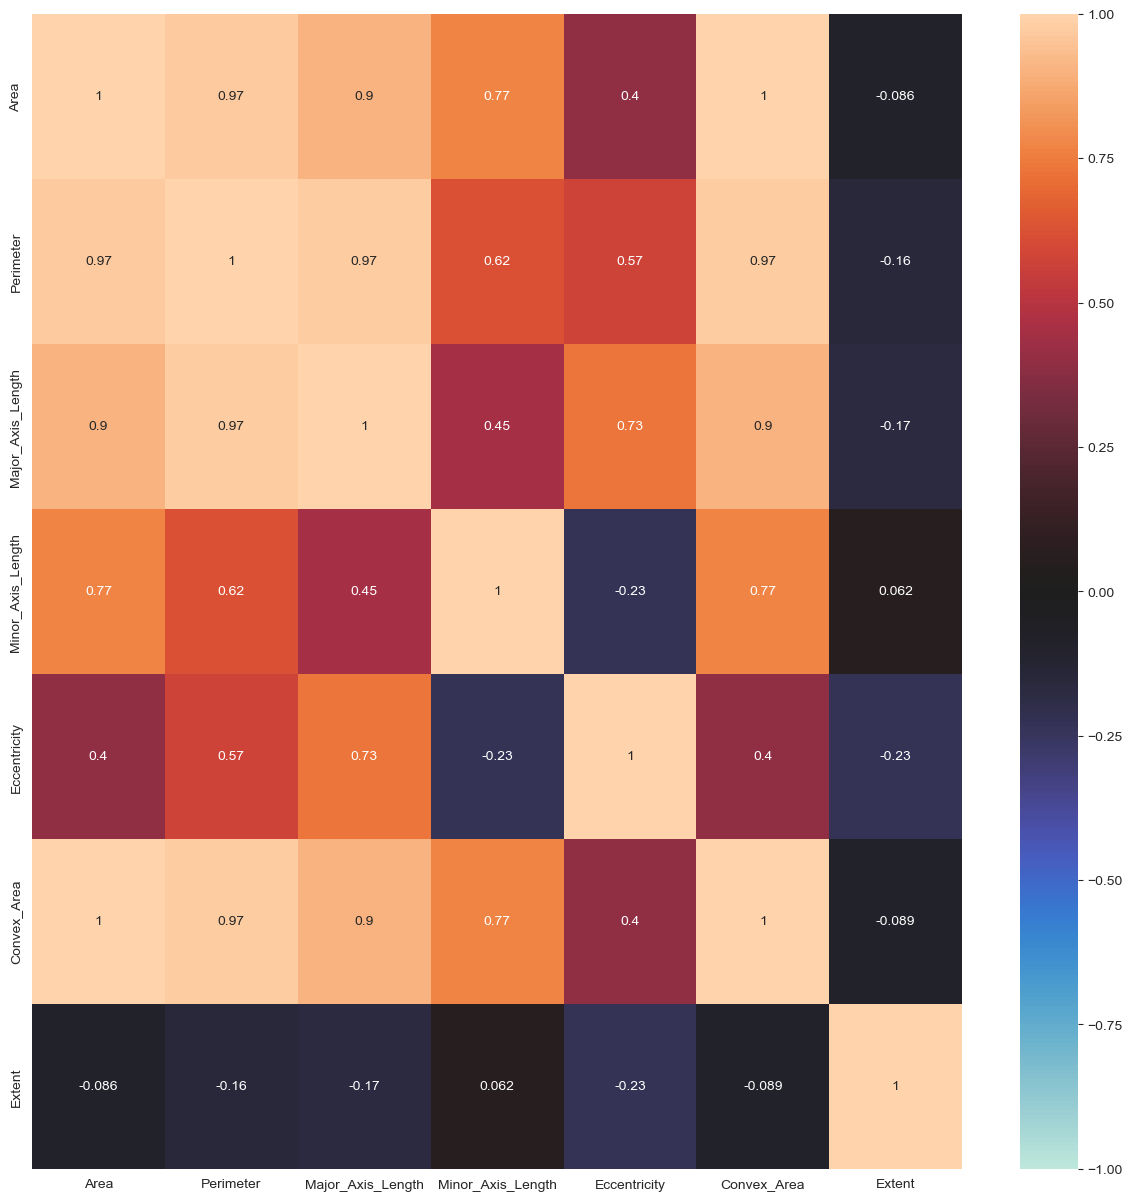

In [8]:
plt.figure(figsize=(15,15))
corr = rice_df.corr('spearman')
sns.heatmap(corr, annot=True, vmin=-1, center=0, vmax=1)
plt.show()

# Data preprocessing

In [9]:
X_rice = rice_df.iloc[:, 0:7].values
y_rice = rice_df.iloc[:, 7].values
le = LabelEncoder()
le.fit(y_rice)
y_rice = le.transform(y_rice)
le.transform(["Cammeo", "Osmancik"])

array([0, 1])

In [10]:
scaler = StandardScaler()
X_rice = scaler.fit_transform(X_rice)
X_rice

array([[ 1.47982953,  2.0043543 ,  2.34854657, ...,  2.01833745,
         1.49965944, -1.15292093],
       [ 1.14787029,  1.12585309,  0.98839042, ...,  0.41001816,
         1.19291767, -0.60207877],
       [ 1.13516924,  1.31721425,  1.45190846, ...,  1.2129565 ,
         1.12650386,  0.405611  ],
       ...,
       [-0.13320373, -0.32985087, -0.29824512, ..., -0.27509915,
        -0.17306812, -0.45573108],
       [-1.60825742, -1.74032002, -1.58097116, ..., -0.59882134,
        -1.60715621, -0.03716757],
       [-0.71225612, -1.39156605, -1.58754648, ..., -2.93916013,
        -0.76628981,  1.82594692]])

In [11]:
X_rice_train, X_rice_test, y_rice_train, y_rice_test = train_test_split(X_rice, y_rice, test_size=0.20, random_state=5)

In [12]:
print(f"Train set shape: {X_rice_train.shape}, {y_rice_train.shape}")
print(f"Test set shape: {X_rice_test.shape}, {y_rice_test.shape}")

Train set shape: (3048, 7), (3048,)
Test set shape: (762, 7), (762,)


# KNN Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

neighbors = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
neighbors.fit(X_rice_train, y_rice_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [14]:
rice_predict = neighbors.predict(X_rice_test)
print(classification_report(y_rice_test, rice_predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       321
           1       0.91      0.93      0.92       441

    accuracy                           0.91       762
   macro avg       0.91      0.90      0.90       762
weighted avg       0.91      0.91      0.91       762



/home/kuro2k/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

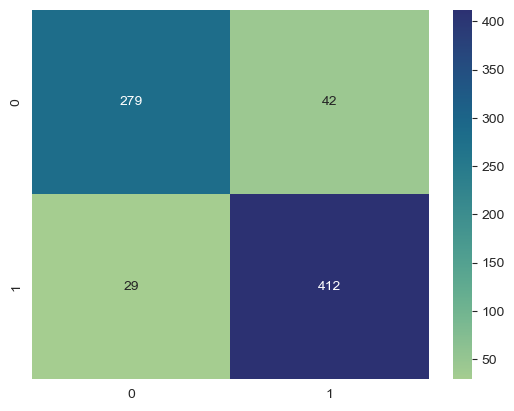

In [15]:
sns.heatmap(confusion_matrix(y_rice_test, rice_predict), annot=True, cmap="crest", fmt='g')

# KNN + Condensed Nearest Neighbor (From lib)

In [16]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=42)

X_rice_train_res, y_rice_train_res = cnn.fit_resample(X_rice_train, y_rice_train)
X_rice_train_res.shape, X_rice_train.shape

/home/kuro2k/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kuro2k/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

((1615, 7), (3048, 7))

In [17]:
neighbors = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
neighbors.fit(X_rice_train_res, y_rice_train_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [18]:
rice_predict = neighbors.predict(X_rice_test)
print(classification_report(y_rice_test, rice_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       321
           1       0.93      0.90      0.91       441

    accuracy                           0.90       762
   macro avg       0.90      0.90      0.90       762
weighted avg       0.90      0.90      0.90       762



/home/kuro2k/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

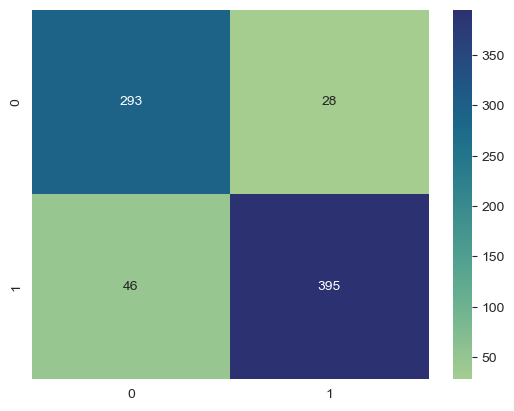

In [19]:
sns.heatmap(confusion_matrix(y_rice_test, rice_predict), annot=True, cmap="crest", fmt='g')

# KKN + Condensed Nearest Neighbor (self-implementation)

In [20]:
def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KNNClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        self.X_train = None
        self.y_train = None

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        nearest_neighbors = []
        for x in x_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            nearest_neighbors.append(y_sorted[:self.k])
        return list(map(most_common, nearest_neighbors))

    def evaluate(self, x_test, y_test):
        y_pred = self.predict(x_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

def condensed_nearest_neighbor(features, label, k):
    # Select the first sample as the first member of the subset
    train_idx_set = {i for i in range(features.shape[0])}
    condensed = np.expand_dims(features[0], axis=0)
    condensed_idx_set = {0}
    condensed_label = np.expand_dims(label[0], axis=0)

    reduced_idx_set = train_idx_set - condensed_idx_set

    # Check if condensed or reduced are not changed then break
    while True:
        is_edit = False
        for idx in reduced_idx_set:
            # Find the nearest neighbor of reduced[i] among samples in condensed
            sample = features[idx]
            sample_label = label[idx]
            knn_ = KNNClassifier(k, dist_metric=euclidean)
            knn_.fit(condensed, condensed_label)
            nearest_neighbor_label = knn_.predict([sample])

            if sample_label != nearest_neighbor_label:
                condensed = np.insert(condensed, condensed.shape[0], sample, 0)
                condensed_label = np.insert(condensed_label, condensed_label.shape[0], sample_label, 0)
                condensed_idx_set.add(idx)
                is_edit = True
        reduced_idx_set = train_idx_set - condensed_idx_set
        if not is_edit:
            break

    return condensed, condensed_label

In [21]:
X_rice_train_res_2, y_rice_train_res_2 = condensed_nearest_neighbor(X_rice_train, y_rice_train, k=3)
neighbors = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
neighbors.fit(X_rice_train_res_2, y_rice_train_res_2)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [22]:
print(f"X train set: X: {X_rice_train.shape}, y: {y_rice_train.shape}")
print(f"Condensed set use lib: X: {X_rice_train_res.shape}, y: {y_rice_train_res.shape}")
print(f"Condensed set self implementation: X: {X_rice_train_res_2.shape}, y: {y_rice_train_res_2.shape}")

X train set: X: (3048, 7), y: (3048,)
Condensed set use lib: X: (1615, 7), y: (1615,)
Condensed set self implementation: X: (611, 7), y: (611,)


In [23]:
rice_predict = neighbors.predict(X_rice_test)
print(classification_report(y_rice_test, rice_predict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       321
           1       0.91      0.91      0.91       441

    accuracy                           0.90       762
   macro avg       0.89      0.89      0.89       762
weighted avg       0.89      0.90      0.89       762



/home/kuro2k/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

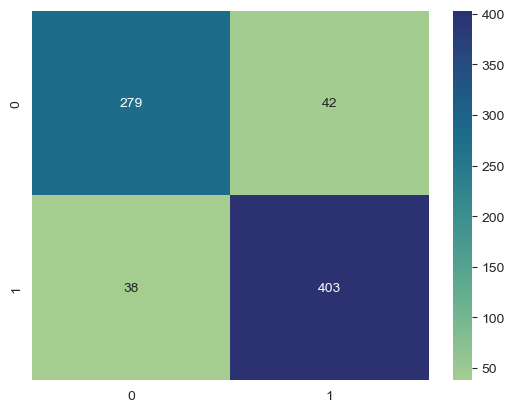

In [24]:
sns.heatmap(confusion_matrix(y_rice_test, rice_predict), annot=True, cmap="crest", fmt='g')

# KNN Self implementation

In [25]:
neighbors = KNNClassifier(k=3, dist_metric=euclidean)
neighbors.fit(X_rice_train, y_rice_train)
rice_predict = neighbors.predict(x_test=X_rice_test)
print(classification_report(y_rice_test, rice_predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       321
           1       0.91      0.93      0.92       441

    accuracy                           0.91       762
   macro avg       0.91      0.90      0.90       762
weighted avg       0.91      0.91      0.91       762



<AxesSubplot:>

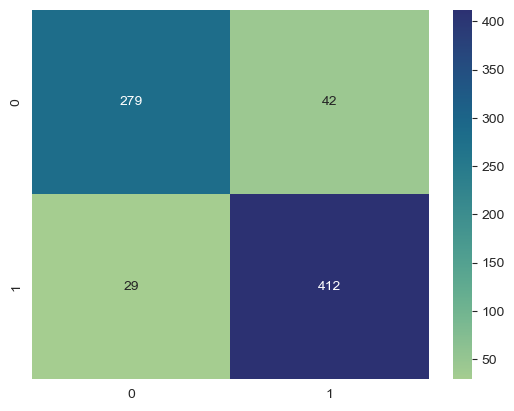

In [26]:
sns.heatmap(confusion_matrix(y_rice_test, rice_predict), annot=True, cmap="crest", fmt='g')